## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.609
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              3216.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:19:37   Log-Likelihood:                         -15690.
No. Observations:               16512   AIC:                                  3.140e+04
Df Residuals:                   16504   BIC:                                  3.146e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

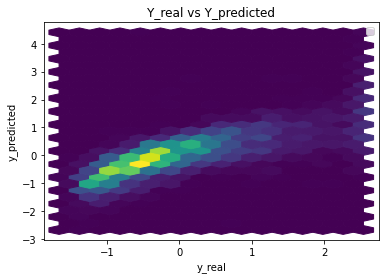

Performance Metrics
Mean Squared Error: 0.4025614339766284
Mean Absolute Error: 0.4666155860031784
Manhattan distance: 1926.1891390211244
Euclidean distance: 40.764857407521035


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.3753781195274443


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9698225	total: 61.7ms	remaining: 1m 1s
1:	learn: 0.9379812	total: 65.1ms	remaining: 32.5s
2:	learn: 0.9072244	total: 67.8ms	remaining: 22.5s
3:	learn: 0.8790029	total: 70.3ms	remaining: 17.5s
4:	learn: 0.8530716	total: 73.1ms	remaining: 14.5s
5:	learn: 0.8290556	total: 76.2ms	remaining: 12.6s
6:	learn: 0.8060432	total: 78.9ms	remaining: 11.2s
7:	learn: 0.7849978	total: 81.6ms	remaining: 10.1s
8:	learn: 0.7665655	total: 84ms	remaining: 9.25s
9:	learn: 0.7478726	total: 86.8ms	remaining: 8.6s
10:	learn: 0.7314153	total: 90.3ms	remaining: 8.12s
11:	learn: 0.7159863	total: 93.3ms	remaining: 7.68s
12:	learn: 0.7025888	total: 96.9ms	remaining: 7.36s
13:	learn: 0.6889210	total: 99.4ms	remaining: 7s
14:	learn: 0.6778553	total: 102ms	remaining: 6.68s
15:	learn: 0.6673660	total: 104ms	remaining: 6.42s
16:	learn: 0.6555972	total: 107ms	remaining: 6.17s
17:	learn: 0.6457275	total: 109ms	remaining: 5.94s
18:	learn: 0.6374909	total: 112ms	remaining: 5.77s
19:

24:	learn: 0.5927843	total: 128ms	remaining: 5s
25:	learn: 0.5870941	total: 131ms	remaining: 4.89s
26:	learn: 0.5799993	total: 133ms	remaining: 4.8s
27:	learn: 0.5735761	total: 139ms	remaining: 4.84s
28:	learn: 0.5676884	total: 142ms	remaining: 4.75s
29:	learn: 0.5613059	total: 144ms	remaining: 4.67s
30:	learn: 0.5573864	total: 147ms	remaining: 4.59s
31:	learn: 0.5538743	total: 149ms	remaining: 4.51s
32:	learn: 0.5496870	total: 152ms	remaining: 4.45s
33:	learn: 0.5467679	total: 155ms	remaining: 4.4s
34:	learn: 0.5422233	total: 157ms	remaining: 4.33s
35:	learn: 0.5389963	total: 160ms	remaining: 4.27s
36:	learn: 0.5362558	total: 162ms	remaining: 4.22s
37:	learn: 0.5324278	total: 164ms	remaining: 4.16s
38:	learn: 0.5287600	total: 167ms	remaining: 4.11s
39:	learn: 0.5264748	total: 169ms	remaining: 4.07s
40:	learn: 0.5243803	total: 172ms	remaining: 4.02s
41:	learn: 0.5222700	total: 175ms	remaining: 3.99s
42:	learn: 0.5190420	total: 177ms	remaining: 3.94s
43:	learn: 0.5163590	total: 186ms	re

44:	learn: 0.5132245	total: 194ms	remaining: 4.11s
45:	learn: 0.5112823	total: 217ms	remaining: 4.5s
46:	learn: 0.5089988	total: 221ms	remaining: 4.48s
47:	learn: 0.5061781	total: 227ms	remaining: 4.51s
48:	learn: 0.5048498	total: 230ms	remaining: 4.47s
49:	learn: 0.5030887	total: 234ms	remaining: 4.45s
50:	learn: 0.5010815	total: 237ms	remaining: 4.41s
51:	learn: 0.4995885	total: 239ms	remaining: 4.36s
52:	learn: 0.4971539	total: 241ms	remaining: 4.31s
53:	learn: 0.4958974	total: 245ms	remaining: 4.28s
54:	learn: 0.4936238	total: 248ms	remaining: 4.27s
55:	learn: 0.4923681	total: 251ms	remaining: 4.23s
56:	learn: 0.4909365	total: 253ms	remaining: 4.19s
57:	learn: 0.4900482	total: 256ms	remaining: 4.16s
58:	learn: 0.4890752	total: 259ms	remaining: 4.12s
59:	learn: 0.4879245	total: 261ms	remaining: 4.09s
60:	learn: 0.4863761	total: 264ms	remaining: 4.07s
61:	learn: 0.4852641	total: 267ms	remaining: 4.04s
62:	learn: 0.4843591	total: 270ms	remaining: 4.01s
63:	learn: 0.4826444	total: 272m

80:	learn: 0.4666095	total: 319ms	remaining: 3.62s
81:	learn: 0.4655778	total: 322ms	remaining: 3.6s
82:	learn: 0.4649644	total: 324ms	remaining: 3.58s
83:	learn: 0.4641878	total: 327ms	remaining: 3.57s
84:	learn: 0.4633761	total: 330ms	remaining: 3.56s
85:	learn: 0.4621156	total: 333ms	remaining: 3.54s
86:	learn: 0.4615628	total: 335ms	remaining: 3.52s
87:	learn: 0.4611251	total: 338ms	remaining: 3.5s
88:	learn: 0.4605648	total: 340ms	remaining: 3.48s
89:	learn: 0.4601652	total: 343ms	remaining: 3.47s
90:	learn: 0.4595363	total: 346ms	remaining: 3.45s
91:	learn: 0.4590227	total: 348ms	remaining: 3.44s
92:	learn: 0.4583486	total: 351ms	remaining: 3.42s
93:	learn: 0.4576025	total: 353ms	remaining: 3.4s
94:	learn: 0.4569817	total: 356ms	remaining: 3.39s
95:	learn: 0.4562465	total: 358ms	remaining: 3.38s
96:	learn: 0.4556317	total: 361ms	remaining: 3.36s
97:	learn: 0.4550071	total: 363ms	remaining: 3.34s
98:	learn: 0.4538986	total: 366ms	remaining: 3.33s
99:	learn: 0.4533265	total: 368ms	

107:	learn: 0.4490526	total: 389ms	remaining: 3.22s
108:	learn: 0.4486489	total: 392ms	remaining: 3.21s
109:	learn: 0.4478487	total: 395ms	remaining: 3.19s
110:	learn: 0.4473840	total: 397ms	remaining: 3.18s
111:	learn: 0.4465513	total: 399ms	remaining: 3.17s
112:	learn: 0.4458030	total: 402ms	remaining: 3.15s
113:	learn: 0.4452495	total: 404ms	remaining: 3.14s
114:	learn: 0.4448565	total: 407ms	remaining: 3.13s
115:	learn: 0.4445191	total: 410ms	remaining: 3.13s
116:	learn: 0.4441096	total: 413ms	remaining: 3.12s
117:	learn: 0.4437384	total: 416ms	remaining: 3.11s
118:	learn: 0.4433305	total: 418ms	remaining: 3.1s
119:	learn: 0.4429229	total: 420ms	remaining: 3.08s
120:	learn: 0.4424596	total: 423ms	remaining: 3.07s
121:	learn: 0.4421237	total: 426ms	remaining: 3.07s
122:	learn: 0.4415877	total: 428ms	remaining: 3.05s
123:	learn: 0.4411513	total: 431ms	remaining: 3.04s
124:	learn: 0.4408069	total: 433ms	remaining: 3.03s
125:	learn: 0.4400998	total: 435ms	remaining: 3.02s
126:	learn: 0

153:	learn: 0.4254745	total: 513ms	remaining: 2.82s
154:	learn: 0.4245336	total: 516ms	remaining: 2.81s
155:	learn: 0.4240834	total: 519ms	remaining: 2.81s
156:	learn: 0.4236387	total: 522ms	remaining: 2.8s
157:	learn: 0.4229614	total: 524ms	remaining: 2.79s
158:	learn: 0.4223863	total: 527ms	remaining: 2.79s
159:	learn: 0.4219559	total: 529ms	remaining: 2.78s
160:	learn: 0.4216214	total: 532ms	remaining: 2.77s
161:	learn: 0.4212061	total: 534ms	remaining: 2.76s
162:	learn: 0.4207066	total: 537ms	remaining: 2.76s
163:	learn: 0.4201203	total: 540ms	remaining: 2.75s
164:	learn: 0.4196798	total: 542ms	remaining: 2.74s
165:	learn: 0.4192281	total: 545ms	remaining: 2.74s
166:	learn: 0.4188777	total: 547ms	remaining: 2.73s
167:	learn: 0.4184723	total: 550ms	remaining: 2.72s
168:	learn: 0.4181274	total: 552ms	remaining: 2.71s
169:	learn: 0.4176166	total: 555ms	remaining: 2.71s
170:	learn: 0.4171971	total: 557ms	remaining: 2.7s
171:	learn: 0.4164747	total: 560ms	remaining: 2.7s
172:	learn: 0.4

179:	learn: 0.4135383	total: 584ms	remaining: 2.66s
180:	learn: 0.4133357	total: 586ms	remaining: 2.65s
181:	learn: 0.4129807	total: 589ms	remaining: 2.65s
182:	learn: 0.4126487	total: 591ms	remaining: 2.64s
183:	learn: 0.4123257	total: 594ms	remaining: 2.63s
184:	learn: 0.4120201	total: 596ms	remaining: 2.63s
185:	learn: 0.4116945	total: 599ms	remaining: 2.62s
186:	learn: 0.4112472	total: 602ms	remaining: 2.62s
187:	learn: 0.4109244	total: 604ms	remaining: 2.61s
188:	learn: 0.4104694	total: 607ms	remaining: 2.6s
189:	learn: 0.4099965	total: 609ms	remaining: 2.6s
190:	learn: 0.4096696	total: 611ms	remaining: 2.59s
191:	learn: 0.4092400	total: 614ms	remaining: 2.58s
192:	learn: 0.4087555	total: 616ms	remaining: 2.58s
193:	learn: 0.4083537	total: 619ms	remaining: 2.57s
194:	learn: 0.4079879	total: 621ms	remaining: 2.56s
195:	learn: 0.4077076	total: 624ms	remaining: 2.56s
196:	learn: 0.4072666	total: 626ms	remaining: 2.55s
197:	learn: 0.4066768	total: 628ms	remaining: 2.54s
198:	learn: 0.

229:	learn: 0.3953935	total: 707ms	remaining: 2.37s
230:	learn: 0.3951647	total: 710ms	remaining: 2.36s
231:	learn: 0.3948636	total: 712ms	remaining: 2.36s
232:	learn: 0.3944908	total: 715ms	remaining: 2.35s
233:	learn: 0.3943095	total: 718ms	remaining: 2.35s
234:	learn: 0.3940597	total: 720ms	remaining: 2.34s
235:	learn: 0.3937447	total: 722ms	remaining: 2.34s
236:	learn: 0.3934480	total: 725ms	remaining: 2.33s
237:	learn: 0.3932409	total: 727ms	remaining: 2.33s
238:	learn: 0.3929010	total: 731ms	remaining: 2.33s
239:	learn: 0.3924809	total: 733ms	remaining: 2.32s
240:	learn: 0.3922181	total: 735ms	remaining: 2.31s
241:	learn: 0.3919769	total: 738ms	remaining: 2.31s
242:	learn: 0.3917537	total: 740ms	remaining: 2.31s
243:	learn: 0.3914450	total: 743ms	remaining: 2.3s
244:	learn: 0.3912522	total: 745ms	remaining: 2.3s
245:	learn: 0.3909599	total: 748ms	remaining: 2.29s
246:	learn: 0.3907731	total: 750ms	remaining: 2.29s
247:	learn: 0.3905673	total: 753ms	remaining: 2.28s
248:	learn: 0.

257:	learn: 0.3881255	total: 779ms	remaining: 2.24s
258:	learn: 0.3880294	total: 781ms	remaining: 2.23s
259:	learn: 0.3877199	total: 784ms	remaining: 2.23s
260:	learn: 0.3874246	total: 786ms	remaining: 2.23s
261:	learn: 0.3871641	total: 788ms	remaining: 2.22s
262:	learn: 0.3869495	total: 791ms	remaining: 2.21s
263:	learn: 0.3866911	total: 794ms	remaining: 2.21s
264:	learn: 0.3865381	total: 796ms	remaining: 2.21s
265:	learn: 0.3860200	total: 799ms	remaining: 2.2s
266:	learn: 0.3856139	total: 801ms	remaining: 2.2s
267:	learn: 0.3854314	total: 804ms	remaining: 2.19s
268:	learn: 0.3850635	total: 806ms	remaining: 2.19s
269:	learn: 0.3848051	total: 809ms	remaining: 2.19s
270:	learn: 0.3847129	total: 811ms	remaining: 2.18s
271:	learn: 0.3844387	total: 814ms	remaining: 2.18s
272:	learn: 0.3842815	total: 816ms	remaining: 2.17s
273:	learn: 0.3838404	total: 818ms	remaining: 2.17s
274:	learn: 0.3835229	total: 821ms	remaining: 2.16s
275:	learn: 0.3833291	total: 823ms	remaining: 2.16s
276:	learn: 0.

306:	learn: 0.3768988	total: 903ms	remaining: 2.04s
307:	learn: 0.3767875	total: 906ms	remaining: 2.03s
308:	learn: 0.3766902	total: 909ms	remaining: 2.03s
309:	learn: 0.3765122	total: 911ms	remaining: 2.03s
310:	learn: 0.3762355	total: 914ms	remaining: 2.02s
311:	learn: 0.3759639	total: 916ms	remaining: 2.02s
312:	learn: 0.3757633	total: 918ms	remaining: 2.02s
313:	learn: 0.3756088	total: 923ms	remaining: 2.02s
314:	learn: 0.3753924	total: 926ms	remaining: 2.01s
315:	learn: 0.3752631	total: 929ms	remaining: 2.01s
316:	learn: 0.3748454	total: 931ms	remaining: 2.01s
317:	learn: 0.3746058	total: 934ms	remaining: 2s
318:	learn: 0.3744453	total: 936ms	remaining: 2s
319:	learn: 0.3742216	total: 939ms	remaining: 2s
320:	learn: 0.3739936	total: 942ms	remaining: 1.99s
321:	learn: 0.3738479	total: 945ms	remaining: 1.99s
322:	learn: 0.3736583	total: 947ms	remaining: 1.99s
323:	learn: 0.3732614	total: 949ms	remaining: 1.98s
324:	learn: 0.3730526	total: 952ms	remaining: 1.98s
325:	learn: 0.3728275

332:	learn: 0.3715319	total: 973ms	remaining: 1.95s
333:	learn: 0.3712576	total: 976ms	remaining: 1.95s
334:	learn: 0.3711206	total: 978ms	remaining: 1.94s
335:	learn: 0.3708279	total: 981ms	remaining: 1.94s
336:	learn: 0.3707145	total: 983ms	remaining: 1.93s
337:	learn: 0.3705258	total: 986ms	remaining: 1.93s
338:	learn: 0.3703829	total: 990ms	remaining: 1.93s
339:	learn: 0.3702205	total: 993ms	remaining: 1.93s
340:	learn: 0.3699906	total: 995ms	remaining: 1.92s
341:	learn: 0.3697932	total: 997ms	remaining: 1.92s
342:	learn: 0.3694504	total: 1s	remaining: 1.92s
343:	learn: 0.3692735	total: 1s	remaining: 1.91s
344:	learn: 0.3690565	total: 1s	remaining: 1.91s
345:	learn: 0.3687951	total: 1.01s	remaining: 1.91s
346:	learn: 0.3686681	total: 1.01s	remaining: 1.9s
347:	learn: 0.3684017	total: 1.01s	remaining: 1.9s
348:	learn: 0.3681322	total: 1.01s	remaining: 1.89s
349:	learn: 0.3679107	total: 1.02s	remaining: 1.89s
350:	learn: 0.3676693	total: 1.02s	remaining: 1.89s
351:	learn: 0.3673679	t

379:	learn: 0.3621497	total: 1.1s	remaining: 1.79s
380:	learn: 0.3619685	total: 1.1s	remaining: 1.79s
381:	learn: 0.3618317	total: 1.1s	remaining: 1.79s
382:	learn: 0.3615964	total: 1.11s	remaining: 1.78s
383:	learn: 0.3615073	total: 1.11s	remaining: 1.78s
384:	learn: 0.3613916	total: 1.11s	remaining: 1.77s
385:	learn: 0.3612315	total: 1.11s	remaining: 1.77s
386:	learn: 0.3610367	total: 1.12s	remaining: 1.77s
387:	learn: 0.3609215	total: 1.12s	remaining: 1.77s
388:	learn: 0.3607353	total: 1.12s	remaining: 1.76s
389:	learn: 0.3606244	total: 1.12s	remaining: 1.76s
390:	learn: 0.3604589	total: 1.13s	remaining: 1.75s
391:	learn: 0.3602361	total: 1.13s	remaining: 1.75s
392:	learn: 0.3600371	total: 1.13s	remaining: 1.75s
393:	learn: 0.3598866	total: 1.13s	remaining: 1.75s
394:	learn: 0.3597806	total: 1.14s	remaining: 1.74s
395:	learn: 0.3596545	total: 1.14s	remaining: 1.74s
396:	learn: 0.3595319	total: 1.14s	remaining: 1.73s
397:	learn: 0.3592201	total: 1.14s	remaining: 1.73s
398:	learn: 0.3

408:	learn: 0.3572742	total: 1.17s	remaining: 1.69s
409:	learn: 0.3571624	total: 1.17s	remaining: 1.69s
410:	learn: 0.3570106	total: 1.18s	remaining: 1.69s
411:	learn: 0.3568697	total: 1.18s	remaining: 1.68s
412:	learn: 0.3567843	total: 1.18s	remaining: 1.68s
413:	learn: 0.3565587	total: 1.19s	remaining: 1.68s
414:	learn: 0.3563932	total: 1.19s	remaining: 1.68s
415:	learn: 0.3562250	total: 1.19s	remaining: 1.67s
416:	learn: 0.3560643	total: 1.19s	remaining: 1.67s
417:	learn: 0.3558601	total: 1.19s	remaining: 1.66s
418:	learn: 0.3556606	total: 1.2s	remaining: 1.66s
419:	learn: 0.3554781	total: 1.2s	remaining: 1.66s
420:	learn: 0.3553529	total: 1.2s	remaining: 1.65s
421:	learn: 0.3552181	total: 1.2s	remaining: 1.65s
422:	learn: 0.3551209	total: 1.2s	remaining: 1.64s
423:	learn: 0.3548060	total: 1.21s	remaining: 1.64s
424:	learn: 0.3546871	total: 1.21s	remaining: 1.63s
425:	learn: 0.3545598	total: 1.21s	remaining: 1.63s
426:	learn: 0.3544320	total: 1.21s	remaining: 1.63s
427:	learn: 0.354

463:	learn: 0.3489759	total: 1.29s	remaining: 1.49s
464:	learn: 0.3487776	total: 1.29s	remaining: 1.49s
465:	learn: 0.3486838	total: 1.29s	remaining: 1.48s
466:	learn: 0.3485109	total: 1.3s	remaining: 1.48s
467:	learn: 0.3484518	total: 1.3s	remaining: 1.48s
468:	learn: 0.3482993	total: 1.3s	remaining: 1.48s
469:	learn: 0.3482431	total: 1.3s	remaining: 1.47s
470:	learn: 0.3481865	total: 1.31s	remaining: 1.47s
471:	learn: 0.3480493	total: 1.31s	remaining: 1.47s
472:	learn: 0.3479061	total: 1.31s	remaining: 1.46s
473:	learn: 0.3477405	total: 1.31s	remaining: 1.46s
474:	learn: 0.3475490	total: 1.32s	remaining: 1.46s
475:	learn: 0.3474632	total: 1.32s	remaining: 1.45s
476:	learn: 0.3473343	total: 1.32s	remaining: 1.45s
477:	learn: 0.3472756	total: 1.32s	remaining: 1.45s
478:	learn: 0.3472250	total: 1.33s	remaining: 1.45s
479:	learn: 0.3471310	total: 1.33s	remaining: 1.44s
480:	learn: 0.3468380	total: 1.33s	remaining: 1.44s
481:	learn: 0.3467306	total: 1.33s	remaining: 1.44s
482:	learn: 0.34

494:	learn: 0.3451802	total: 1.37s	remaining: 1.4s
495:	learn: 0.3450292	total: 1.37s	remaining: 1.39s
496:	learn: 0.3449175	total: 1.37s	remaining: 1.39s
497:	learn: 0.3448135	total: 1.38s	remaining: 1.39s
498:	learn: 0.3446796	total: 1.38s	remaining: 1.38s
499:	learn: 0.3445890	total: 1.38s	remaining: 1.38s
500:	learn: 0.3444246	total: 1.38s	remaining: 1.38s
501:	learn: 0.3443303	total: 1.39s	remaining: 1.37s
502:	learn: 0.3441817	total: 1.39s	remaining: 1.37s
503:	learn: 0.3441019	total: 1.39s	remaining: 1.37s
504:	learn: 0.3439944	total: 1.39s	remaining: 1.36s
505:	learn: 0.3439182	total: 1.39s	remaining: 1.36s
506:	learn: 0.3438213	total: 1.4s	remaining: 1.36s
507:	learn: 0.3436060	total: 1.4s	remaining: 1.35s
508:	learn: 0.3435446	total: 1.4s	remaining: 1.35s
509:	learn: 0.3433975	total: 1.4s	remaining: 1.35s
510:	learn: 0.3431741	total: 1.41s	remaining: 1.34s
511:	learn: 0.3430773	total: 1.41s	remaining: 1.34s
512:	learn: 0.3429524	total: 1.41s	remaining: 1.34s
513:	learn: 0.342

542:	learn: 0.3389997	total: 1.49s	remaining: 1.25s
543:	learn: 0.3389213	total: 1.49s	remaining: 1.25s
544:	learn: 0.3387937	total: 1.49s	remaining: 1.25s
545:	learn: 0.3386808	total: 1.5s	remaining: 1.24s
546:	learn: 0.3385021	total: 1.5s	remaining: 1.24s
547:	learn: 0.3383873	total: 1.5s	remaining: 1.24s
548:	learn: 0.3383372	total: 1.5s	remaining: 1.24s
549:	learn: 0.3382357	total: 1.5s	remaining: 1.23s
550:	learn: 0.3381221	total: 1.51s	remaining: 1.23s
551:	learn: 0.3380277	total: 1.51s	remaining: 1.23s
552:	learn: 0.3379007	total: 1.51s	remaining: 1.22s
553:	learn: 0.3377968	total: 1.51s	remaining: 1.22s
554:	learn: 0.3377313	total: 1.52s	remaining: 1.22s
555:	learn: 0.3375889	total: 1.52s	remaining: 1.21s
556:	learn: 0.3374210	total: 1.52s	remaining: 1.21s
557:	learn: 0.3373385	total: 1.52s	remaining: 1.21s
558:	learn: 0.3372505	total: 1.53s	remaining: 1.21s
559:	learn: 0.3370542	total: 1.53s	remaining: 1.2s
560:	learn: 0.3369427	total: 1.53s	remaining: 1.2s
561:	learn: 0.33682

572:	learn: 0.3356498	total: 1.56s	remaining: 1.17s
573:	learn: 0.3355963	total: 1.57s	remaining: 1.16s
574:	learn: 0.3354888	total: 1.57s	remaining: 1.16s
575:	learn: 0.3354074	total: 1.57s	remaining: 1.16s
576:	learn: 0.3352531	total: 1.57s	remaining: 1.15s
577:	learn: 0.3351262	total: 1.58s	remaining: 1.15s
578:	learn: 0.3349969	total: 1.58s	remaining: 1.15s
579:	learn: 0.3349075	total: 1.59s	remaining: 1.15s
580:	learn: 0.3347651	total: 1.59s	remaining: 1.15s
581:	learn: 0.3346505	total: 1.59s	remaining: 1.14s
582:	learn: 0.3346195	total: 1.59s	remaining: 1.14s
583:	learn: 0.3345014	total: 1.6s	remaining: 1.14s
584:	learn: 0.3343957	total: 1.6s	remaining: 1.14s
585:	learn: 0.3342059	total: 1.6s	remaining: 1.13s
586:	learn: 0.3340719	total: 1.6s	remaining: 1.13s
587:	learn: 0.3339186	total: 1.61s	remaining: 1.13s
588:	learn: 0.3338686	total: 1.61s	remaining: 1.12s
589:	learn: 0.3337446	total: 1.61s	remaining: 1.12s
590:	learn: 0.3334953	total: 1.61s	remaining: 1.12s
591:	learn: 0.33

617:	learn: 0.3303649	total: 1.68s	remaining: 1.04s
618:	learn: 0.3301880	total: 1.69s	remaining: 1.04s
619:	learn: 0.3301215	total: 1.69s	remaining: 1.03s
620:	learn: 0.3299987	total: 1.69s	remaining: 1.03s
621:	learn: 0.3299175	total: 1.69s	remaining: 1.03s
622:	learn: 0.3298283	total: 1.69s	remaining: 1.02s
623:	learn: 0.3297042	total: 1.7s	remaining: 1.02s
624:	learn: 0.3296098	total: 1.7s	remaining: 1.02s
625:	learn: 0.3294805	total: 1.7s	remaining: 1.02s
626:	learn: 0.3293639	total: 1.7s	remaining: 1.01s
627:	learn: 0.3292559	total: 1.71s	remaining: 1.01s
628:	learn: 0.3291246	total: 1.71s	remaining: 1.01s
629:	learn: 0.3290326	total: 1.71s	remaining: 1.01s
630:	learn: 0.3289351	total: 1.72s	remaining: 1s
631:	learn: 0.3287747	total: 1.72s	remaining: 1s
632:	learn: 0.3287122	total: 1.72s	remaining: 997ms
633:	learn: 0.3286309	total: 1.72s	remaining: 994ms
634:	learn: 0.3285659	total: 1.72s	remaining: 991ms
635:	learn: 0.3284684	total: 1.73s	remaining: 988ms
636:	learn: 0.3283599	

648:	learn: 0.3269519	total: 1.76s	remaining: 951ms
649:	learn: 0.3268400	total: 1.76s	remaining: 949ms
650:	learn: 0.3267540	total: 1.76s	remaining: 946ms
651:	learn: 0.3266713	total: 1.77s	remaining: 943ms
652:	learn: 0.3265590	total: 1.77s	remaining: 940ms
653:	learn: 0.3265079	total: 1.77s	remaining: 938ms
654:	learn: 0.3263738	total: 1.77s	remaining: 935ms
655:	learn: 0.3262624	total: 1.78s	remaining: 932ms
656:	learn: 0.3261681	total: 1.78s	remaining: 929ms
657:	learn: 0.3260698	total: 1.78s	remaining: 926ms
658:	learn: 0.3259536	total: 1.78s	remaining: 924ms
659:	learn: 0.3258459	total: 1.79s	remaining: 921ms
660:	learn: 0.3257224	total: 1.79s	remaining: 918ms
661:	learn: 0.3255814	total: 1.79s	remaining: 915ms
662:	learn: 0.3254742	total: 1.79s	remaining: 912ms
663:	learn: 0.3253426	total: 1.8s	remaining: 910ms
664:	learn: 0.3252262	total: 1.8s	remaining: 907ms
665:	learn: 0.3251307	total: 1.8s	remaining: 904ms
666:	learn: 0.3250252	total: 1.8s	remaining: 902ms
667:	learn: 0.32

695:	learn: 0.3220720	total: 1.88s	remaining: 820ms
696:	learn: 0.3219863	total: 1.88s	remaining: 817ms
697:	learn: 0.3218547	total: 1.88s	remaining: 815ms
698:	learn: 0.3217393	total: 1.89s	remaining: 812ms
699:	learn: 0.3216195	total: 1.89s	remaining: 809ms
700:	learn: 0.3215167	total: 1.89s	remaining: 806ms
701:	learn: 0.3214530	total: 1.89s	remaining: 804ms
702:	learn: 0.3214004	total: 1.9s	remaining: 801ms
703:	learn: 0.3213752	total: 1.9s	remaining: 798ms
704:	learn: 0.3212788	total: 1.9s	remaining: 795ms
705:	learn: 0.3211508	total: 1.9s	remaining: 792ms
706:	learn: 0.3210662	total: 1.9s	remaining: 789ms
707:	learn: 0.3210088	total: 1.91s	remaining: 787ms
708:	learn: 0.3208544	total: 1.91s	remaining: 784ms
709:	learn: 0.3207556	total: 1.91s	remaining: 781ms
710:	learn: 0.3206768	total: 1.91s	remaining: 778ms
711:	learn: 0.3205986	total: 1.92s	remaining: 776ms
712:	learn: 0.3205580	total: 1.92s	remaining: 773ms
713:	learn: 0.3204464	total: 1.92s	remaining: 770ms
714:	learn: 0.320

726:	learn: 0.3192118	total: 1.96s	remaining: 735ms
727:	learn: 0.3190975	total: 1.96s	remaining: 732ms
728:	learn: 0.3190050	total: 1.96s	remaining: 729ms
729:	learn: 0.3189132	total: 1.96s	remaining: 727ms
730:	learn: 0.3187662	total: 1.97s	remaining: 724ms
731:	learn: 0.3186179	total: 1.97s	remaining: 721ms
732:	learn: 0.3185358	total: 1.97s	remaining: 719ms
733:	learn: 0.3183957	total: 1.98s	remaining: 716ms
734:	learn: 0.3182980	total: 1.98s	remaining: 713ms
735:	learn: 0.3181999	total: 1.98s	remaining: 710ms
736:	learn: 0.3181293	total: 1.98s	remaining: 708ms
737:	learn: 0.3180373	total: 1.99s	remaining: 705ms
738:	learn: 0.3179262	total: 1.99s	remaining: 702ms
739:	learn: 0.3178067	total: 1.99s	remaining: 699ms
740:	learn: 0.3177142	total: 1.99s	remaining: 697ms
741:	learn: 0.3176377	total: 2s	remaining: 694ms
742:	learn: 0.3175222	total: 2s	remaining: 691ms
743:	learn: 0.3174132	total: 2s	remaining: 688ms
744:	learn: 0.3173450	total: 2s	remaining: 686ms
745:	learn: 0.3172524	to

773:	learn: 0.3148633	total: 2.07s	remaining: 605ms
774:	learn: 0.3147885	total: 2.08s	remaining: 603ms
775:	learn: 0.3147258	total: 2.08s	remaining: 600ms
776:	learn: 0.3146367	total: 2.08s	remaining: 597ms
777:	learn: 0.3145787	total: 2.08s	remaining: 595ms
778:	learn: 0.3144931	total: 2.09s	remaining: 592ms
779:	learn: 0.3142727	total: 2.09s	remaining: 589ms
780:	learn: 0.3141606	total: 2.09s	remaining: 587ms
781:	learn: 0.3140359	total: 2.09s	remaining: 584ms
782:	learn: 0.3139128	total: 2.1s	remaining: 581ms
783:	learn: 0.3137773	total: 2.1s	remaining: 578ms
784:	learn: 0.3136764	total: 2.1s	remaining: 576ms
785:	learn: 0.3135825	total: 2.1s	remaining: 573ms
786:	learn: 0.3135040	total: 2.11s	remaining: 570ms
787:	learn: 0.3134301	total: 2.11s	remaining: 568ms
788:	learn: 0.3133546	total: 2.11s	remaining: 565ms
789:	learn: 0.3132569	total: 2.11s	remaining: 562ms
790:	learn: 0.3131404	total: 2.12s	remaining: 559ms
791:	learn: 0.3130775	total: 2.12s	remaining: 557ms
792:	learn: 0.31

804:	learn: 0.3119713	total: 2.15s	remaining: 521ms
805:	learn: 0.3118695	total: 2.15s	remaining: 518ms
806:	learn: 0.3117980	total: 2.15s	remaining: 516ms
807:	learn: 0.3117368	total: 2.16s	remaining: 513ms
808:	learn: 0.3116701	total: 2.16s	remaining: 510ms
809:	learn: 0.3116172	total: 2.16s	remaining: 507ms
810:	learn: 0.3115580	total: 2.17s	remaining: 505ms
811:	learn: 0.3114894	total: 2.17s	remaining: 502ms
812:	learn: 0.3114237	total: 2.17s	remaining: 499ms
813:	learn: 0.3113280	total: 2.17s	remaining: 497ms
814:	learn: 0.3112435	total: 2.18s	remaining: 494ms
815:	learn: 0.3111044	total: 2.18s	remaining: 491ms
816:	learn: 0.3109898	total: 2.18s	remaining: 488ms
817:	learn: 0.3109057	total: 2.18s	remaining: 486ms
818:	learn: 0.3107846	total: 2.19s	remaining: 483ms
819:	learn: 0.3107427	total: 2.19s	remaining: 480ms
820:	learn: 0.3106841	total: 2.19s	remaining: 478ms
821:	learn: 0.3105907	total: 2.19s	remaining: 475ms
822:	learn: 0.3104119	total: 2.19s	remaining: 472ms
823:	learn: 

852:	learn: 0.3075914	total: 2.27s	remaining: 391ms
853:	learn: 0.3075434	total: 2.27s	remaining: 388ms
854:	learn: 0.3074463	total: 2.27s	remaining: 386ms
855:	learn: 0.3073808	total: 2.27s	remaining: 383ms
856:	learn: 0.3072703	total: 2.28s	remaining: 380ms
857:	learn: 0.3072116	total: 2.28s	remaining: 377ms
858:	learn: 0.3071037	total: 2.28s	remaining: 375ms
859:	learn: 0.3070196	total: 2.29s	remaining: 372ms
860:	learn: 0.3069789	total: 2.29s	remaining: 369ms
861:	learn: 0.3069141	total: 2.29s	remaining: 367ms
862:	learn: 0.3068123	total: 2.29s	remaining: 364ms
863:	learn: 0.3066396	total: 2.29s	remaining: 361ms
864:	learn: 0.3065907	total: 2.3s	remaining: 359ms
865:	learn: 0.3064986	total: 2.3s	remaining: 356ms
866:	learn: 0.3064098	total: 2.3s	remaining: 353ms
867:	learn: 0.3063168	total: 2.3s	remaining: 350ms
868:	learn: 0.3061818	total: 2.31s	remaining: 348ms
869:	learn: 0.3060626	total: 2.31s	remaining: 345ms
870:	learn: 0.3059335	total: 2.31s	remaining: 342ms
871:	learn: 0.30

884:	learn: 0.3045731	total: 2.35s	remaining: 305ms
885:	learn: 0.3045188	total: 2.35s	remaining: 302ms
886:	learn: 0.3044413	total: 2.35s	remaining: 300ms
887:	learn: 0.3042786	total: 2.35s	remaining: 297ms
888:	learn: 0.3041465	total: 2.36s	remaining: 294ms
889:	learn: 0.3040772	total: 2.36s	remaining: 291ms
890:	learn: 0.3040078	total: 2.36s	remaining: 289ms
891:	learn: 0.3039167	total: 2.36s	remaining: 286ms
892:	learn: 0.3038185	total: 2.37s	remaining: 283ms
893:	learn: 0.3037173	total: 2.37s	remaining: 281ms
894:	learn: 0.3036485	total: 2.37s	remaining: 278ms
895:	learn: 0.3035345	total: 2.37s	remaining: 275ms
896:	learn: 0.3034831	total: 2.37s	remaining: 273ms
897:	learn: 0.3033988	total: 2.38s	remaining: 270ms
898:	learn: 0.3033010	total: 2.38s	remaining: 267ms
899:	learn: 0.3032255	total: 2.38s	remaining: 265ms
900:	learn: 0.3031667	total: 2.38s	remaining: 262ms
901:	learn: 0.3030762	total: 2.39s	remaining: 259ms
902:	learn: 0.3030039	total: 2.39s	remaining: 257ms
903:	learn: 

931:	learn: 0.3007748	total: 2.46s	remaining: 180ms
932:	learn: 0.3006858	total: 2.47s	remaining: 177ms
933:	learn: 0.3006236	total: 2.47s	remaining: 174ms
934:	learn: 0.3005740	total: 2.47s	remaining: 172ms
935:	learn: 0.3005040	total: 2.47s	remaining: 169ms
936:	learn: 0.3004674	total: 2.48s	remaining: 167ms
937:	learn: 0.3004089	total: 2.48s	remaining: 164ms
938:	learn: 0.3003347	total: 2.48s	remaining: 161ms
939:	learn: 0.3002651	total: 2.48s	remaining: 159ms
940:	learn: 0.3000960	total: 2.48s	remaining: 156ms
941:	learn: 0.3000123	total: 2.49s	remaining: 153ms
942:	learn: 0.2999468	total: 2.49s	remaining: 151ms
943:	learn: 0.2998350	total: 2.49s	remaining: 148ms
944:	learn: 0.2997671	total: 2.5s	remaining: 145ms
945:	learn: 0.2996087	total: 2.5s	remaining: 143ms
946:	learn: 0.2994769	total: 2.5s	remaining: 140ms
947:	learn: 0.2994147	total: 2.5s	remaining: 137ms
948:	learn: 0.2993745	total: 2.5s	remaining: 135ms
949:	learn: 0.2992357	total: 2.51s	remaining: 132ms
950:	learn: 0.299

962:	learn: 0.2982851	total: 2.54s	remaining: 97.6ms
963:	learn: 0.2982137	total: 2.54s	remaining: 94.9ms
964:	learn: 0.2981078	total: 2.54s	remaining: 92.3ms
965:	learn: 0.2980166	total: 2.55s	remaining: 89.7ms
966:	learn: 0.2979674	total: 2.55s	remaining: 87ms
967:	learn: 0.2978597	total: 2.55s	remaining: 84.4ms
968:	learn: 0.2978072	total: 2.56s	remaining: 81.8ms
969:	learn: 0.2977602	total: 2.56s	remaining: 79.1ms
970:	learn: 0.2976470	total: 2.56s	remaining: 76.5ms
971:	learn: 0.2975522	total: 2.56s	remaining: 73.8ms
972:	learn: 0.2974693	total: 2.56s	remaining: 71.2ms
973:	learn: 0.2974027	total: 2.57s	remaining: 68.5ms
974:	learn: 0.2973554	total: 2.57s	remaining: 65.9ms
975:	learn: 0.2973029	total: 2.57s	remaining: 63.3ms
976:	learn: 0.2972274	total: 2.58s	remaining: 60.6ms
977:	learn: 0.2971557	total: 2.58s	remaining: 58ms
978:	learn: 0.2970521	total: 2.58s	remaining: 55.3ms
979:	learn: 0.2970046	total: 2.58s	remaining: 52.7ms
980:	learn: 0.2969330	total: 2.58s	remaining: 50.1

Mean Squared error 0.14414536173717665


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9712125735452464
